In [1]:
import pandas as pd

# Load trader data
trader_df = pd.read_csv("historical_data.csv")

# Load fear-greed dataset
sentiment_df = pd.read_csv("fear_greed_index.csv")

trader_df.head(), sentiment_df.head()


/tmp/ipython-input-1438507278.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trader_df = pd.read_csv("historical_data.csv")


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash  \
 0         0.0  0xec0

In [2]:
trader_df['Timestamp IST'] = pd.to_datetime(
    trader_df['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)
trader_df['date_only'] = trader_df['Timestamp IST'].dt.date


In [3]:
trader_df['dollar_volume'] = trader_df['Execution Price'] * trader_df['Size Tokens']

In [4]:
trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce')

In [5]:
trader_df['win'] = trader_df['Closed PnL'] > 0

Step 2

In [6]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['date_only'] = sentiment_df['date'].dt.date

In [7]:
sentiment_df['sentiment'] = sentiment_df['classification'].replace({
    "Extreme Fear": "Fear",
    "Extreme Greed": "Greed"
})

Step 3

In [8]:
merged = trader_df.merge(
    sentiment_df[['date_only', 'sentiment', 'value']],
    on='date_only',
    how='left'
)


Step 4

Analysis 1: Average Profitability in Fear vs Greed

In [9]:
import os

# Create outputs folder if it doesn't exist
os.makedirs("outputs", exist_ok=True)


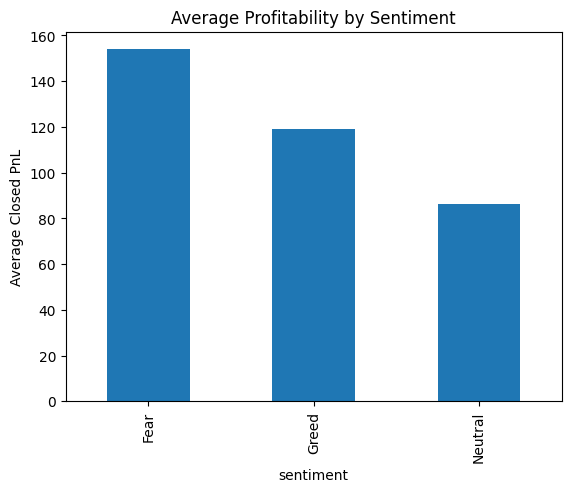

In [10]:
merged.groupby('sentiment')['Closed PnL'].mean()

import matplotlib.pyplot as plt

merged.groupby('sentiment')['Closed PnL'].mean().plot(kind='bar')
plt.title("Average Profitability by Sentiment")
plt.ylabel("Average Closed PnL")
plt.savefig("outputs/profit_vs_sentiment.png")
plt.show()


Analysis 2: Trading Volume in Fear vs Greed

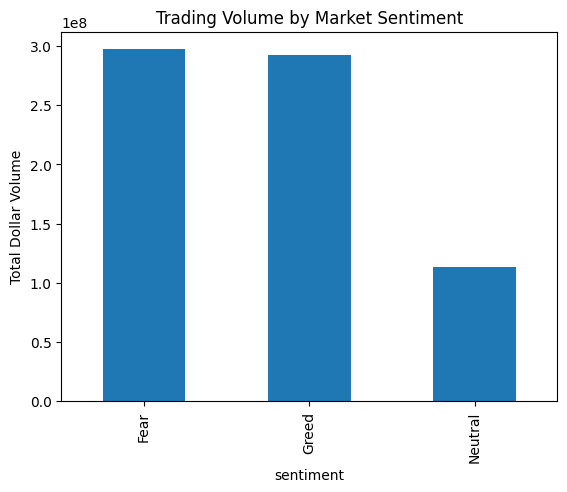

In [11]:
merged.groupby('sentiment')['dollar_volume'].sum()

merged.groupby('sentiment')['dollar_volume'].sum().plot(kind='bar')
plt.title("Trading Volume by Market Sentiment")
plt.ylabel("Total Dollar Volume")
plt.savefig("outputs/volume_vs_sentiment.png")
plt.show()



Analysis 3: Buy vs Sell Behavior

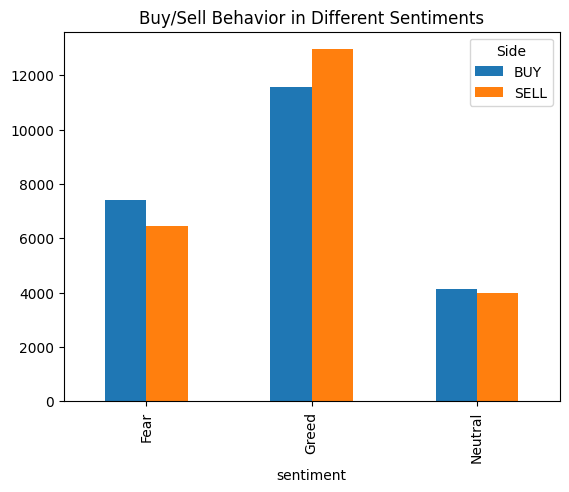

In [12]:
merged.groupby(['sentiment', 'Side']).size().unstack().plot(kind='bar')
plt.title("Buy/Sell Behavior in Different Sentiments")
plt.savefig("outputs/buy_sell_sentiment.png")
plt.show()


Analysis 4: Win Rate vs Sentiment

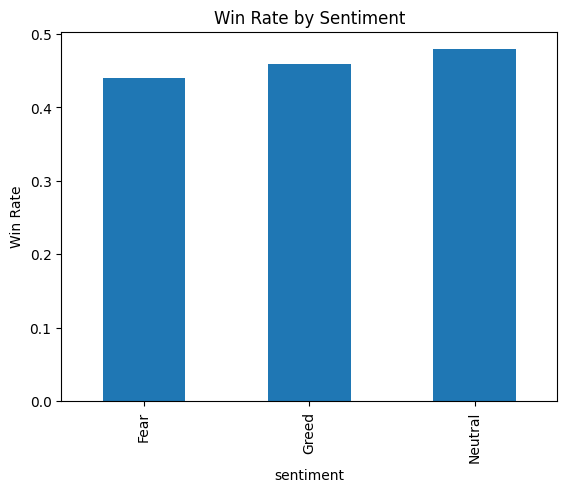

In [13]:
merged.groupby('sentiment')['win'].mean()

merged.groupby('sentiment')['win'].mean().plot(kind='bar')
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate")
plt.savefig("outputs/winrate_sentiment.png")
plt.show()


Save Cleaned & Merged Data

In [14]:
import os

os.makedirs("csv_files", exist_ok=True)

In [15]:
merged.to_csv("csv_files/merged_data.csv", index=False)